<h1 style='text-align: center'><strong>DBSCAN Clustering</strong></h1>
<h3 style='text-align: center'>Machine learning</h3>
<h5 style='text-align: center'><a href='https://github.com/AlvaroVasquezAI'>Álvaro Vásquez AI</a></h5>

<div style='text-align: center'>
    <a href='https://github.com/AlvaroVasquezAI'><img src='https://img.icons8.com/color/48/000000/github--v1.png'/></a>
    <a href='https://www.linkedin.com/in/%C3%A1lvaro-garc%C3%ADa-v%C3%A1squez-8a2a001bb/'><img src='https://img.icons8.com/color/48/000000/linkedin.png'/></a>
    <a href='https://www.instagram.com/alvarovasquez.ai'><img src='https://img.icons8.com/color/48/000000/instagram-new--v1.png'/></a>
    <a href='https://twitter.com/alvarovasquezai'><img src='https://img.icons8.com/color/48/000000/twitter--v1.png'/></a>
    <a href='https://www.youtube.com/channel/UCd8GEklq1EbrxGQYK0CXDTA'><img src='https://img.icons8.com/color/48/000000/youtube-play.png'/></a>
    <a href='mailto: agarciav2102@alumno.ipn.mx'><img src='https://img.icons8.com/color/48/000000/email.png'/></a>
</div>

<h4 style='text-align: center'>Using DBSCAN Clustering</h4>

<div>
    <h3><strong>Table of contents</strong></h3>
    <ol>
        <li><a href="#Introduction">Introduction</a></li>
        <li><a href="#Libraries">Libraries</a></li>
        <li><a href="#Dataset">Dataset</a></li>
        <li><a href="#DBSCAN-Clustering">DBSCAN Clustering</a></li>
        <li><a href="#Evaluation">Evaluation</a></li>
        <li><a href="#Conclusion">Conclusion</a></li>
        <li><a href="#Video">Explanation Video</a></li>
    </ol>
</div>

<h2 style='text-align: center' id='Introduction'><strong>1. Introduction</strong></h2>
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together closely packed points, while identifying points in sparse regions as outliers.
It is especially useful for finding clusters of arbitrary shapes, and can handle noise well, making it suitable for real-world datasets.


<h2 style='text-align: center' id='Libraries'><strong>2. Libraries</strong></h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

- **numpy**: For numerical computations and data manipulation.
- **pandas**: To structure and organize the data.
- **matplotlib.pyplot**: For visualizing the dataset and clustering results.
- **DBSCAN from sklearn.cluster**: To perform the DBSCAN clustering.

<h2 style='text-align: center' id='Dataset'><strong>3. Dataset</strong></h2>


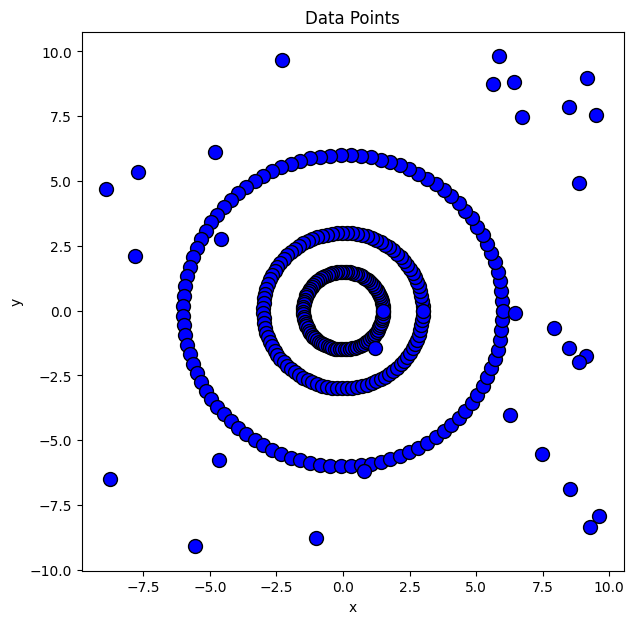

In [2]:
# Generating data points forming concentric spirals
t = np.linspace(0, 2 * np.pi, 100)

# Outer spiral
x1 = 6 * np.cos(t)
y1 = 6 * np.sin(t)

# Intermediate spiral
x2 = 3 * np.cos(t)
y2 = 3 * np.sin(t)

# Central spiral
x3 = 1.5 * np.cos(t)
y3 = 1.5 * np.sin(t)

# Combine the spirals
x = np.concatenate([x1, x2, x3])
y = np.concatenate([y1, y2, y3])

# Add random noise points
x_noise = np.random.uniform(low=-10, high=10, size=30)  # Noise points match
y_noise = np.random.uniform(low=-10, high=10, size=30)

# Combine data and noise
x = np.concatenate([x, x_noise])
y = np.concatenate([y, y_noise])

# Final dataset
data = np.vstack((x, y)).T

# Plot the data points
plt.figure(figsize=(7, 7))
plt.scatter(data[:, 0], data[:, 1], c='b', s=100, edgecolor='k')
plt.title('Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


- **t = np.linspace(0, 2 * np.pi, 100)**: Generates 100 points between 0 and 2π to define the spirals.
- **x1, y1**: Coordinates for the outer spiral using cosine and sine functions, with a radius of 6.
- **x2, y2**: Coordinates for the intermediate spiral, with a smaller radius of 3.
- **x3, y3**: Coordinates for the central spiral with the smallest radius of 1.5.
- **x = np.concatenate([x1, x2, x3])**: Combines all the x-coordinates from the three spirals into a single array.
- **y = np.concatenate([y1, y2, y3])**: Combines all the y-coordinates from the three spirals into a single array.
- **x_noise, y_noise**: Randomly generated points representing noise to add outliers to the dataset.
- **x = np.concatenate([x, x_noise])** / **y = np.concatenate([y, y_noise])**: Combines the spiral data points with the noise points to create the final dataset.
- **data = np.vstack((x, y)).T**: Stacks the x and y values together as columns to form the final 2D dataset.
- **plt.scatter(data[:, 0], data[:, 1], c='b', s=100, edgecolor='k')**: Plots the data points as blue circles, each with a size of 100 and black edges.
- **plt.title('Data Points')**: Sets the title of the plot.
- **plt.xlabel('x') / plt.ylabel('y')**: Labels the x and y axes for better understanding.
- **plt.show()**: Displays the plot of the generated data points, showing the three spirals and noise.

<h2 style='text-align: center' id='DBSCAN-Clustering'><strong>4. DBSCAN Clustering</strong></h2>
DBSCAN works by defining a region (using the `eps` parameter) around each point and considering a minimum number of points (`min_samples`) in that region to form a cluster. Points that don’t belong to any dense region are labeled as outliers.


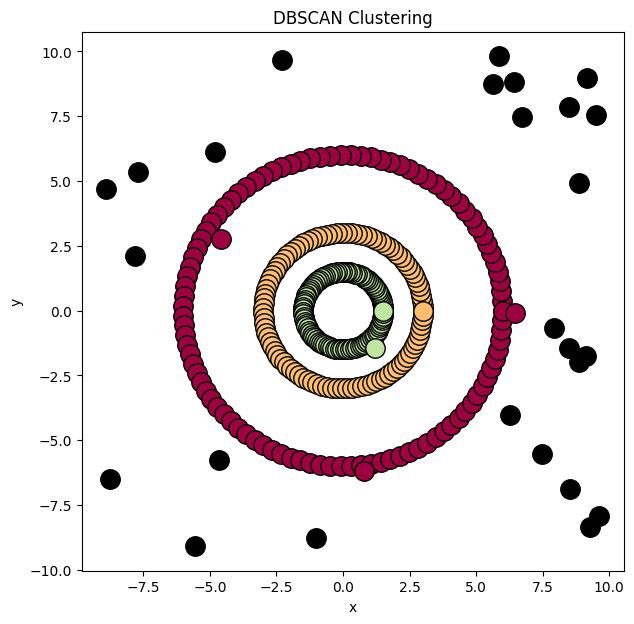

In [3]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(data)

# Plot DBSCAN results
labels = dbscan.labels_

plt.figure(figsize=(7, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise.

    class_member_mask = (labels == k)

    xy = data[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

plt.title('DBSCAN Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

- **dbscan = DBSCAN(eps=1, min_samples=5)**: Initializes the DBSCAN model with epsilon distance set to 1 and minimum samples per cluster set to 5.
- **dbscan.fit(data)**: Fits the DBSCAN model to the dataset.
- **labels = dbscan.labels_**: Retrieves the cluster labels for each data point. Noise points are labeled as -1.
- **plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)**: Plots the clustered points with different colors for each cluster.
- **plt.title('DBSCAN Clustering')**: Sets the title of the plot.
- **plt.xlabel('x') / plt.ylabel('y')**: Labels the x and y axes.
- **plt.show()**: Displays the DBSCAN clustering results, with noise points in black and clusters in various colors.


<h2 style='text-align: center' id='Evaluation'><strong>5. Evaluation</strong></h2>
We will visualize the clusters created by DBSCAN. Points labeled as `-1` are considered outliers, and the rest are clustered.

In [4]:
# Number of clusters in DBSCAN excluding noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

Estimated number of clusters: 3
Estimated number of noise points: 26


- **n_clusters = len(set(labels)) - (1 if -1 in labels else 0)**: Calculates the number of clusters identified by DBSCAN, excluding noise points.
- **n_noise = list(labels).count(-1)**: Counts the number of noise points identified by DBSCAN.
- **print(f'Estimated number of clusters: {n_clusters}')**: Displays the estimated number of clusters.
- **print(f'Estimated number of noise points: {n_noise}')**: Displays the estimated number of noise points.

<h2 style='text-align: center' id='Conclusion'><strong>6. Conclusion</strong></h2>

DBSCAN is an effective clustering algorithm that can identify clusters of arbitrary shapes and handle noise well. It is particularly useful for real-world datasets where the data may not be uniformly distributed. By setting appropriate values for the `eps` and `min_samples` parameters, DBSCAN can accurately cluster data points and identify outliers.

<h2 style='text-align: center' id='Video'><strong>Explanation Video</strong></h2>

<div style='text-align: center'>
    <a href='https://www.instagram.com/reel/DA6a64nRDeZ/'><img src='Videos/DBSCAN.png' width='250'/></a>
    <p>Click on the image to watch the video</p>
</div>